In [8]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import chess
from stockfish import Stockfish
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('data/chess-eval.csv')

elo_bins = [0, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 3000]
elo_labels = ['<1200', '1200-1399', '1400-1599', '1600-1799', '1800-1999', '2000-2199', '2200-2399', '2400+']
## probably the same
df['white_group'] = pd.cut(df['white_rating'], bins=elo_bins, labels=elo_labels)
df['black_group'] = pd.cut(df['black_rating'], bins=elo_bins, labels=elo_labels)

white_resigns = df.loc[df['white_result'] == 'resigned'].sort_values(by=['white_rating'])
black_resigns = df.loc[df['black_result'] == 'resigned'].sort_values(by=['black_rating'])

white_resigns['evaluation'].mean(), black_resigns['evaluation'].mean()

(-7.416169132258777, 7.532310637417218)

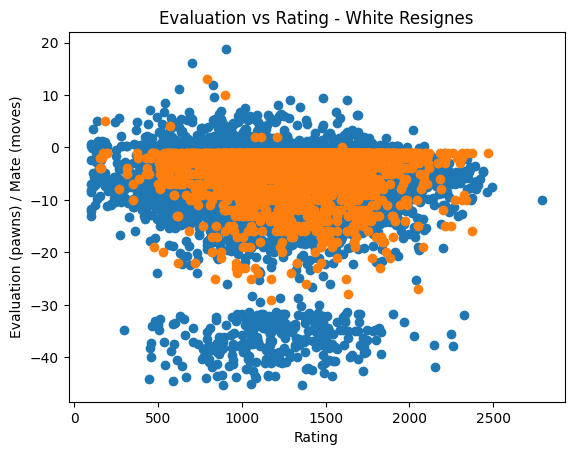

In [10]:
plt.title('Evaluation vs Rating - White Resignes')
plt.xlabel('Rating')
plt.ylabel('Evaluation (pawns) / Mate (moves)')
plt.scatter(white_resigns['white_rating'], white_resigns['evaluation'])
plt.scatter(white_resigns['white_rating'], white_resigns['mate'])

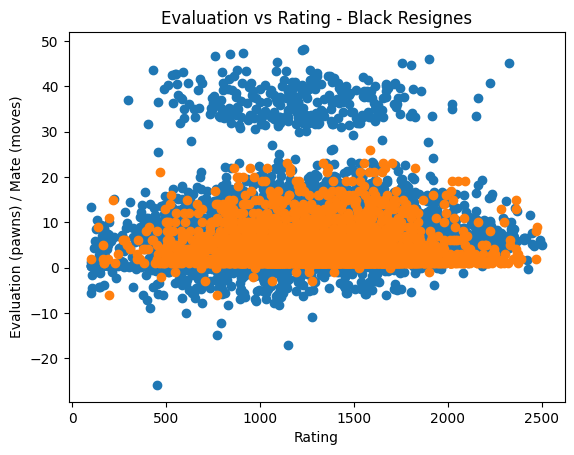

In [11]:
plt.title('Evaluation vs Rating - Black Resignes')
plt.xlabel('Rating')
plt.ylabel('Evaluation (pawns) / Mate (moves)')
plt.scatter(black_resigns['black_rating'], black_resigns['evaluation'])
plt.scatter(black_resigns['black_rating'], black_resigns['mate'])

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '<1200'),
  Text(1, 0, '1200-1399'),
  Text(2, 0, '1400-1599'),
  Text(3, 0, '1600-1799'),
  Text(4, 0, '1800-1999'),
  Text(5, 0, '2000-2199'),
  Text(6, 0, '2200-2399'),
  Text(7, 0, '2400+')])

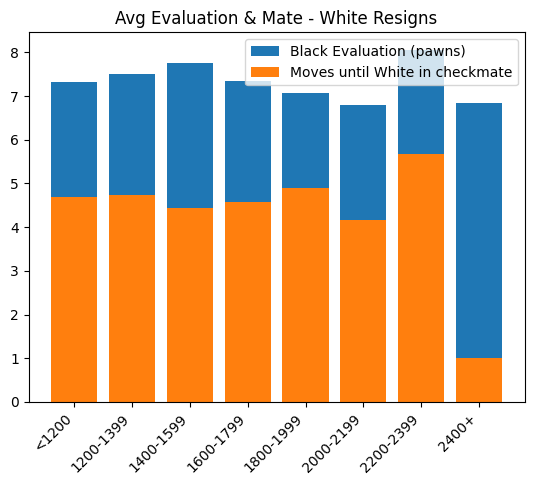

In [57]:
evals = dict(white_resigns.groupby('white_group')['evaluation'].mean())
mates = dict(white_resigns.groupby('white_group')['mate'].mean())
xs = list(evals.keys())
evals = [-i for i in list(evals.values())]
mates = [-i for i in list(mates.values())]

plt.title('Avg Evaluation & Mate - White Resigns')
plt.bar(xs, evals, label='Black Evaluation (pawns)')
plt.bar(xs, mates, label='Moves until White in checkmate')
plt.legend()
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '<1200'),
  Text(1, 0, '1200-1399'),
  Text(2, 0, '1400-1599'),
  Text(3, 0, '1600-1799'),
  Text(4, 0, '1800-1999'),
  Text(5, 0, '2000-2199'),
  Text(6, 0, '2200-2399'),
  Text(7, 0, '2400+')])

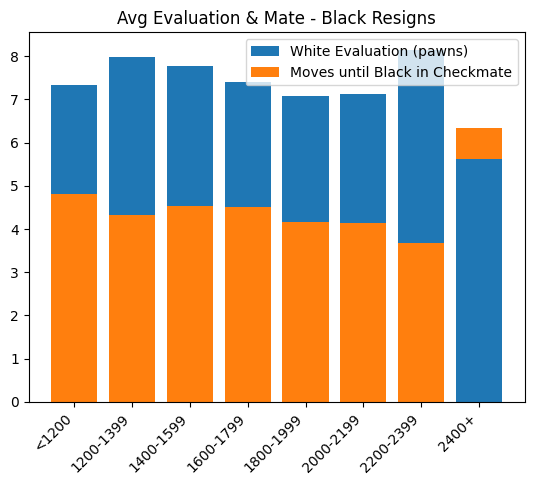

In [58]:
evals = dict(black_resigns.groupby('black_group')['evaluation'].mean())
mates = dict(black_resigns.groupby('black_group')['mate'].mean())
xs = xs2 = list(evals.keys())
evals = list(evals.values())
mates = list(mates.values())

plt.title('Avg Evaluation & Mate - Black Resigns')
plt.bar(xs[:-1], evals[:-1], label='White Evaluation (pawns)')
plt.bar(xs[:-1], mates[:-1], label='Moves until Black in Checkmate')
plt.bar(xs[-1], evals[-1], zorder=2, color = '#1f77b4')
plt.bar(xs[-1], mates[-1], zorder=1, color = '#ff7f0e')
plt.legend()
plt.xticks(rotation=45, ha='right')